In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 67.3 MB/s eta 0:00:00


# 데이터 불러오기 및 가공

In [ ]:
df_closed = pd.read_csv("/content/drive/MyDrive/DSL/24-2 EDA/Dataset/df_closed_23.csv")

In [ ]:
df_filtered = df_closed[["자치구_코드_명", "기준_년분기_코드","서비스_업종_코드","서비스_업종_코드_명","점포_수", "개업_점포_수", "프랜차이즈_점포_수", "폐업_점포_수"]]
df_filtered.head()

,자치구_코드_명,기준_년분기_코드,서비스_업종_코드,서비스_업종_코드_명,점포_수,개업_점포_수,프랜차이즈_점포_수,폐업_점포_수
0,강동구,20241,CS300043,소매(전자제품),2018.0,3.0,4.0,117.0
1,강동구,20241,CS300039,소매(운송),19.0,0.0,0.0,0.0
2,강동구,20241,CS300038,소매(운송),91.0,1.0,2.0,1.0
3,강동구,20241,CS300036,소매(가구),137.0,0.0,0.0,4.0
4,강동구,20241,CS300032,소매(전자제품),137.0,0.0,0.0,5.0


In [ ]:
df_grouped = df_filtered.groupby(["서비스_업종_코드_명", "자치구_코드_명", "기준_년분기_코드"]).agg({"점포_수":"sum", "개업_점포_수":"sum", "프랜차이즈_점포_수":"sum", "폐업_점포_수":"sum"}).reset_index()

# 23개 업종 카테고리 별 점포수 평균 (모든 자치구, 년분기 통합 후 평균)
df_grouped2 = df_grouped.groupby("서비스_업종_코드_명").agg({"점포_수":"mean","개업_점포_수":"mean","프랜차이즈_점포_수":"mean","폐업_점포_수":"mean"})
df_grouped2


,점포_수,개업_점포_수,프랜차이즈_점포_수,폐업_점포_수
서비스_업종_코드_명,,,,
교육/학원,1315.699048,49.668571,97.598095,37.142857
미용,1081.651429,36.975238,57.335238,25.881905
반려동물,114.373333,4.998095,2.283810,2.838095
부동산,1334.756190,25.516190,0.340952,21.796190
소매(가구),500.689524,5.419048,0.579048,5.148571
소매(미용),728.817143,20.169524,51.285714,22.933333
소매(생활),539.226667,31.575238,426.280000,29.979048
소매(서적/문구),348.462857,6.331429,19.064762,5.834286
소매(스포츠),160.274286,3.312381,0.321905,2.780952


In [ ]:
#시각화 할 데이터
df_for_visual = df_grouped2
df_for_visual.rename(columns={"점포_수":"영세점포_수"}, inplace = True)
df_for_visual["프랜차이즈_영세점포_비율"] = df_for_visual["프랜차이즈_점포_수"] / df_for_visual["영세점포_수"]
df_for_visual["총_점포_수"] = df_for_visual["영세점포_수"] + df_for_visual["프랜차이즈_점포_수"]
df_for_visual["프랜차이즈_비율"]= df_for_visual["프랜차이즈_점포_수"] / df_for_visual["총_점포_수"]
df_for_visual["영세점포_비율"] = df_for_visual["영세점포_수"] / df_for_visual["총_점포_수"]
df_for_visual["영세점포_비율"] = df_for_visual["영세점포_수"] / df_for_visual["총_점포_수"]
df_for_visual["개업_율"] = df_for_visual["개업_점포_수"] / df_for_visual["총_점포_수"]*100
df_for_visual["폐업_률"] = df_for_visual["폐업_점포_수"] / df_for_visual["총_점포_수"]*100
df_for_visual

,영세점포_수,개업_점포_수,프랜차이즈_점포_수,폐업_점포_수,프랜차이즈_영세점포_비율,총_점포_수,프랜차이즈_비율,영세점포_비율,개업_율,폐업_률
서비스_업종_코드_명,,,,,,,,,,
교육/학원,1315.699048,49.668571,97.598095,37.142857,0.074180,1413.297143,0.069057,0.930943,3.514376,2.628100
미용,1081.651429,36.975238,57.335238,25.881905,0.053007,1138.986667,0.050339,0.949661,3.246328,2.272362
반려동물,114.373333,4.998095,2.283810,2.838095,0.019968,116.657143,0.019577,0.980423,4.284431,2.432852
부동산,1334.756190,25.516190,0.340952,21.796190,0.000255,1335.097143,0.000255,0.999745,1.911186,1.632555
소매(가구),500.689524,5.419048,0.579048,5.148571,0.001157,501.268571,0.001155,0.998845,1.081067,1.027108
소매(미용),728.817143,20.169524,51.285714,22.933333,0.070368,780.102857,0.065742,0.934258,2.585495,2.939783
소매(생활),539.226667,31.575238,426.280000,29.979048,0.790540,965.506667,0.441509,0.558491,3.270328,3.105007
소매(서적/문구),348.462857,6.331429,19.064762,5.834286,0.054711,367.527619,0.051873,0.948127,1.722708,1.587441
소매(스포츠),160.274286,3.312381,0.321905,2.780952,0.002008,160.596190,0.002004,0.997996,2.062553,1.731643


# 업종별 개,폐업률 비교 시각화

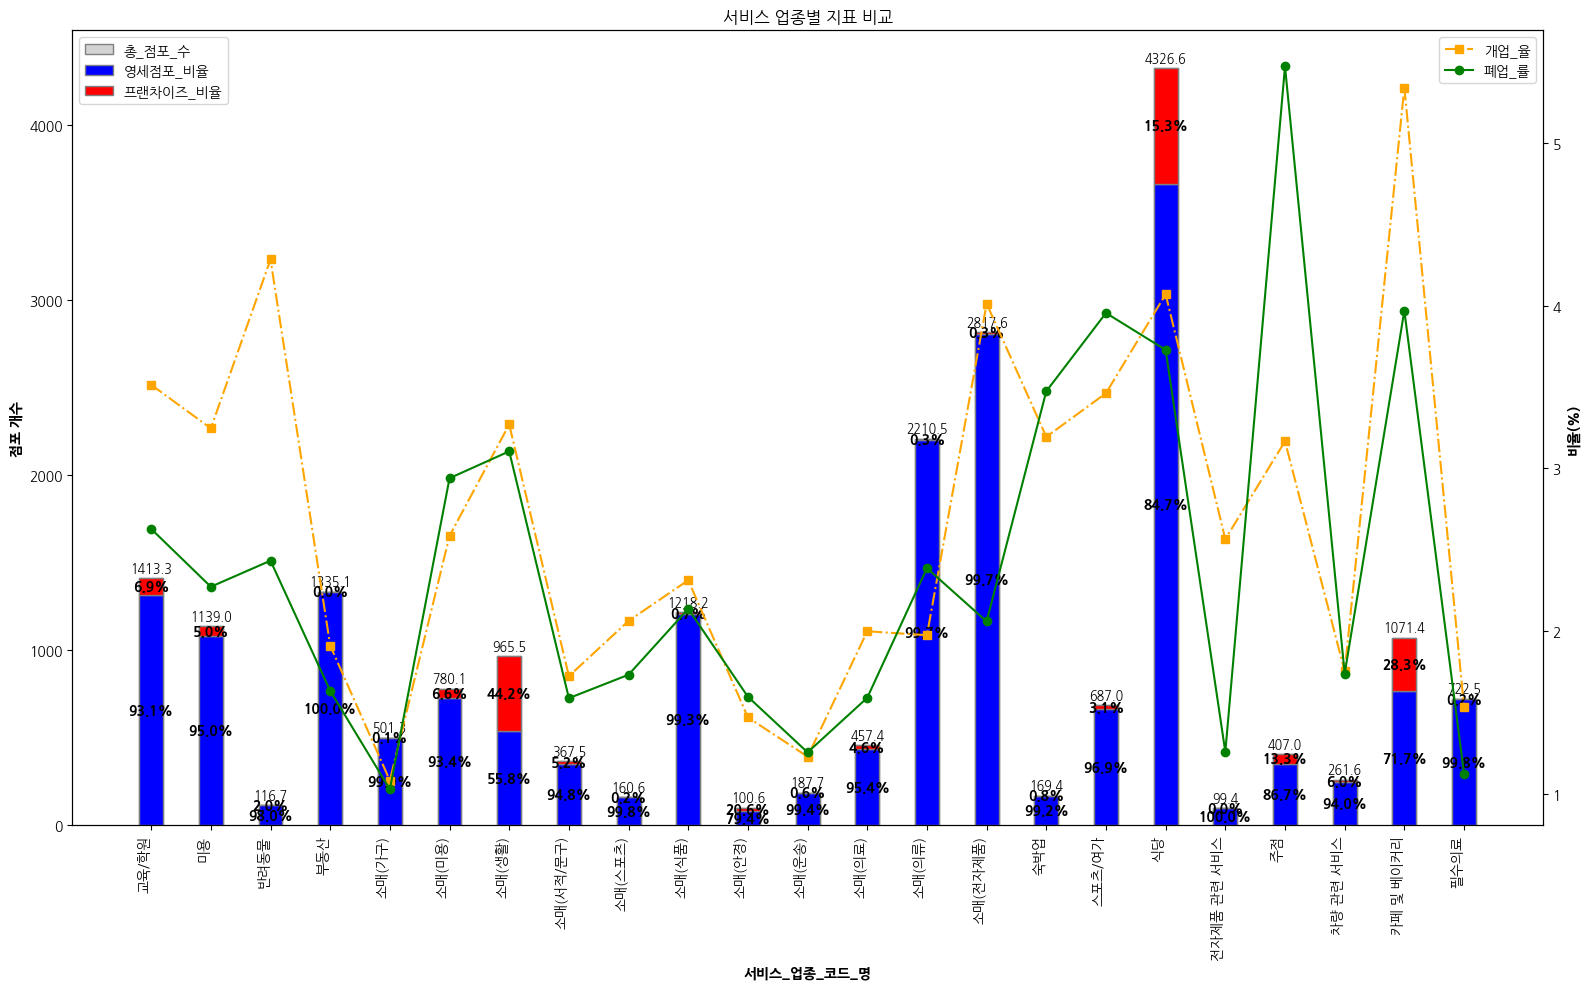

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 10))

positions = np.arange(len(df_for_visual))


# 전체 점포수 막대 그래프로
bars = ax1.bar(positions, df_for_visual['총_점포_수'], color='lightgray', edgecolor='grey', width=0.4, label='총_점포_수')

# Stacking 영세점포_비율 & 프랜차이즈_비율
small_business_bars = ax1.bar(positions, df_for_visual['영세점포_비율'] * df_for_visual['총_점포_수'], color='blue', width=0.4, edgecolor='grey', label='영세점포_비율')
franchise_bars = ax1.bar(positions, df_for_visual['프랜차이즈_비율'] * df_for_visual['총_점포_수'], bottom=df_for_visual['영세점포_비율'] * df_for_visual['총_점포_수'], color='red', width=0.4, edgecolor='grey', label='프랜차이즈_비율')


ax2 = ax1.twinx()

# 업종별 총 개업_율, 폐업_률
ax2.plot(positions, df_for_visual['개업_율'], color='orange', marker='s', label='개업_율', linestyle='-.')
ax2.plot(positions, df_for_visual['폐업_률'], color='green', marker='o', label='폐업_률', linestyle='-')

# 수치 Annotation : 업종별 전체 점포 수
for bar, val in zip(bars, df_for_visual['총_점포_수']):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, f'{val:.1f}', ha='center', va='bottom', fontsize=9)

# 수치 Annotation :업종별 영세점포_비율 - 백분위로
for bar, percentage in zip(small_business_bars, df_for_visual['영세점포_비율']):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{percentage * 100:.1f}%',
        ha='center',
        va='center',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

# 수치 Annotation :업종별 프랜차이즈_비율 - 백분위로
for i, (bar, percentage, bottom) in enumerate(zip(franchise_bars, df_for_visual['프랜차이즈_비율'], df_for_visual['영세점포_비율'])):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        (bottom * df_for_visual['총_점포_수'].iloc[i]) + (percentage * df_for_visual['총_점포_수'].iloc[i]) / 2,
        f'{percentage * 100:.1f}%',
        ha='center',
        va='center',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

# Adding labels and title
ax1.set_xlabel('서비스_업종_코드_명', fontweight='bold')
ax1.set_ylabel('점포 개수', fontweight='bold')
ax2.set_ylabel('비율(%)', fontweight='bold')
plt.title('서비스 업종별 지표 비교')

# x label Rotation
#plt.xticks(positions, df_for_visual.index, rotation=90)
ax1.set_xticks(positions)
ax1.set_xticklabels(df_for_visual.index, rotation=90, ha='right')

# Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()